In [13]:
import geopandas as gpd
%matplotlib inline
%config Completer.use_jedi = False



In [14]:
import os
os.getcwd()

'C:\\Users\\Shakur\\Documents\\scripts\\Projects_DEC17'

In [15]:
fp = 'C:\\Users\\Shakur\\Documents\\scripts\\Projects_DEC17\\DATA\\Europe_borders.shp'

In [16]:
data = gpd.read_file(fp)

In [17]:
data.head()

,TZID,geometry
0,Europe/Berlin,"POLYGON ((8.457777976989746 54.56236267089844,..."
1,Europe/Berlin,"POLYGON ((8.71992015838623 47.69664382934571, ..."
2,Europe/Berlin,"POLYGON ((6.733166694641113 53.5740852355957, ..."
3,Europe/Berlin,"POLYGON ((6.858222007751465 53.59411239624024,..."
4,Europe/Berlin,"POLYGON ((6.89894437789917 53.6256103515625, 6..."


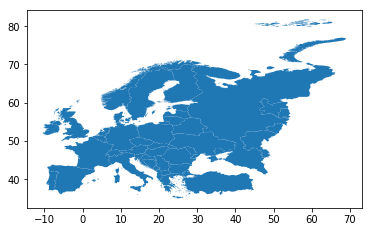

In [18]:
data.plot()

In [19]:
data.crs

{'init': 'epsg:4326'}

In [8]:
data['geometry'].head()

0    POLYGON ((8.457777976989746 54.56236267089844,...
1    POLYGON ((8.71992015838623 47.69664382934571, ...
2    POLYGON ((6.733166694641113 53.5740852355957, ...
3    POLYGON ((6.858222007751465 53.59411239624024,...
4    POLYGON ((6.89894437789917 53.6256103515625, 6...
Name: geometry, dtype: object

In [21]:
data_proj = data.copy()

In [23]:
data_proj = data_proj.to_crs(epsg=3035)

In [24]:
data_proj['geometry'].head()

0    POLYGON ((4221214.558083206 3496203.404098808,...
1    POLYGON ((4224860.478301956 2732279.319200804,...
2    POLYGON ((4104652.175534055 3390034.952743419,...
3    POLYGON ((4113025.664273634 3391895.755246869,...
4    POLYGON ((4115871.227616003 3395282.099030705,...
Name: geometry, dtype: object

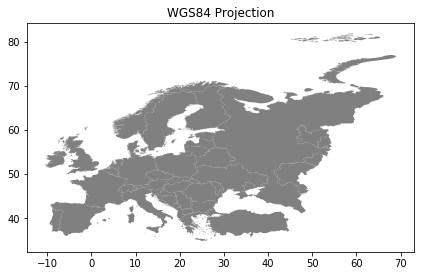

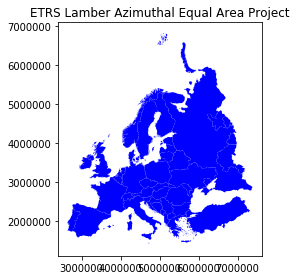

In [25]:
import matplotlib.pyplot as plt

data.plot(facecolor='gray')
plt.title("WGS84 Projection")
plt.tight_layout()

data_proj.plot(facecolor='blue')
plt.title('ETRS Lamber Azimuthal Equal Area Project')

plt.tight_layout()

### Saving CRS

Next, we still need to change the crs of our GeoDataFrame into EPSG 3035 as 
now we only modified the values of the geometry column. 
We can take use of fiona’s from_epsg -function.

In [28]:
from fiona.crs import from_epsg

In [29]:
data_proj.crs = from_epsg(3035)

In [30]:
data_proj.crs

{'init': 'epsg:3035', 'no_defs': True}

In [32]:
outfp = 'C:\\Users\\Shakur\\Documents\\scripts\\Projects_DEC17\\DATA\\Europe_borders_epsg3035.shp'

In [33]:
data_proj.to_file(outfp)